# Stock market clustering

_Data Structures and Algorithms_

_Imperial College Business School_


---
This assignment is divided into three parts. In the first part, you will work on `pandas` data analysis. In the second part, you will implement a clustering algorithm to group companies based on their stock price movements. In the final part, you will explore ways to extend and improve this analysis. 

---

**The assignment is graded not only on correctness but also on the presentation of the results.** Try to make the results of your calculations easy to read with eg string formatting, do some plots if you find them useful, and comment your code.

**There are no OK tests to test your functions in this assignment.** It is intended to set you up working on a real problem where you have to explore data and the problem to figure out your approach. The first part will also require you to use a search engine to find the right pandas functions to use to analyse your data. Some potentially useful pandas functions are listed in the file `veryUseful.py`. 

**You're working as a group, so you may wish to divide the work into smaller pieces.** Some of you may want to start working on the Pandas part, and others on the algorithm part. There is a set of intermediary results available for testing your algorithm, so you can start immediately on both parts. See the details below in question 3.

**You may use generative AI (such as chatGPT) in the last part 3 of the assignment, but not in the other parts.** If you use generative AI (or other sources), please explain clearly how you have used it.

## Your group

You'll complete this assignment in your assigned study groups. If you are unsure about your group, please contact the programme team.

## Submission

Create a zip file containing your submission notebook (and possible other files required to run your code). Submit by uploading the zip file on the Hub: Go to DSA -> Assessment -> Homework 3. Only one submission is needed for your group. **Please note that the Hub has a file size limit.**

## Part 1: Pandas

**30% of grade**

In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [77]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings ("ignore")

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

In [6]:
price_data

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,148.189203,44.272341,56.803111,103.227707,38.605835,239.688297,94.300003,148.953695,9.290114,108.882926,...,34.870979,10.636072,46.878702,38.910551,36.670848,34.110001,72.708631,102.048397,27.560025,47.824658
2015-12-28,148.218606,44.203626,57.084893,103.079148,38.714948,239.169142,94.199997,150.372014,9.173745,108.207559,...,35.261251,10.411228,46.829718,38.930084,36.542246,33.599998,72.551420,101.393919,27.421133,47.596117
2015-12-29,149.855459,44.979129,57.765054,104.307222,39.260511,236.393678,95.330002,152.020057,9.319206,109.458975,...,35.339308,10.529314,47.202005,39.467252,36.700524,34.040001,72.944441,102.129305,27.589787,48.023390


### Question 1: Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [7]:
# Calculate company returns in this cell
price_data.sort_index(inplace=True)
prices_return =pd.DataFrame()
for idx,col in enumerate(price_data.columns):
    prices_return[col] = price_data[col] / price_data[col].shift(1) - 1

In [8]:
price_data['MMM']

Date
2015-01-02    156.678596
2015-01-05    153.145069
2015-01-06    151.511999
2015-01-07    152.610267
2015-01-08    156.267949
                 ...    
2015-12-24    148.189203
2015-12-28    148.218606
2015-12-29    149.855459
2015-12-30    148.894914
2015-12-31    147.650116
Name: MMM, Length: 252, dtype: float64

In [9]:
prices_return

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.022553,0.000223,-0.018819,-0.016884,-0.013910,-0.024021,-0.004976,-0.013181,-0.028467,-0.013514,...,-0.011351,-0.021818,-0.018349,0.006096,-0.062237,-0.020729,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.010664,-0.011356,-0.004950,-0.007213,-0.018640,-0.012526,-0.020145,-0.000703,-0.022539,0.001484,...,0.005321,-0.013383,-0.014486,0.004905,-0.005881,0.001628,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.007249,0.008108,0.040417,0.020989,-0.021561,0.017729,0.008223,0.021489,0.001537,0.020061,...,0.008635,0.012811,0.000474,0.000574,0.007887,-0.012599,0.033138,0.024870,0.009546,0.020643
2015-01-08,0.023967,0.020554,0.010459,0.015249,0.009969,0.034985,0.025453,0.008765,0.015349,0.032406,...,0.011599,0.027530,0.022275,0.016356,0.007546,0.033752,0.017420,0.010617,0.013994,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,0.000198,0.000000,-0.002049,-0.001820,0.002060,-0.000250,-0.004224,0.000470,0.004193,-0.004088,...,-0.003068,0.005545,-0.000627,0.009630,-0.001616,-0.009869,-0.001619,0.001362,0.003975,0.003126
2015-12-28,0.000198,-0.001552,0.004961,-0.001439,0.002826,-0.002166,-0.001061,0.009522,-0.012526,-0.006203,...,0.011192,-0.021140,-0.001045,0.000502,-0.003507,-0.014952,-0.002162,-0.006413,-0.005040,-0.004779
2015-12-29,0.011044,0.017544,0.011915,0.011914,0.014092,-0.011605,0.011996,0.010960,0.015856,0.011565,...,0.002214,0.011342,0.007950,0.013798,0.004331,0.013095,0.005417,0.007253,0.006151,0.008977


### Question 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [10]:
prices_return = prices_return.reset_index()

In [11]:
melt_data = pd.melt(prices_return,id_vars='Date',value_vars=prices_return.columns.tolist()[1:],value_name='return',var_name='stock_name')

In [12]:
# Highest Daily Return
print('Top 10 Highest Daily Return')
melt_data.sort_values('return',ascending=False)[:10]

Top 10 Highest Daily Return


,Date,stock_name,return
49556,2015-08-27,FCX,0.286616
121581,2015-06-22,WMB,0.258999
111329,2015-10-14,TRIP,0.255361
53946,2015-01-29,HAR,0.237600
92698,2015-11-06,QRVO,0.232254
122409,2015-10-02,WYNN,0.228389
111160,2015-02-12,TRIP,0.224915
57809,2015-05-29,HUM,0.203128
64714,2015-10-21,KLAC,0.187895
86753,2015-04-08,PRGO,0.183899


In [13]:
# Lowest Daily Return
print('Top 10 Lowest Daily Return')
melt_data.sort_values('return',ascending=True)[:10]

Top 10 Lowest Daily Return


,Date,stock_name,return
93187,2015-10-16,PWR,-0.285006
74439,2015-05-27,KORS,-0.241954
17528,2015-07-24,BIIB,-0.220802
103776,2015-10-23,SRCL,-0.192767
124176,2015-10-07,YUM,-0.188324
88978,2015-02-04,RL,-0.182169
74965,2015-06-26,MU,-0.181515
82637,2015-12-04,NRG,-0.179581
70523,2015-11-09,MNK,-0.169981
3735,2015-10-28,AKAM,-0.167306


### Question 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest yearly returns.

In [14]:
yearly_return = pd.DataFrame(price_data.iloc[-1] / price_data.iloc[0] - 1)
yearly_return.columns = ['yearly_return']

In [15]:
# Highest Yearly Return
print('Top 10 Yearly Daily Return')
yearly_return.sort_values('yearly_return',ascending=False)[:10]

Top 10 Yearly Daily Return


,yearly_return
NFLX,1.294549
AMZN,1.190750
ATVI,0.942684
AYI,0.676443
NVDA,0.664514
GPN,0.600933
HRL,0.559016
EXR,0.544469
VRSN,0.527540
RAI,0.497837


In [16]:
# Lowest Yearly Return
print('Top 10 Lowest Daily Return')
yearly_return.sort_values('yearly_return',ascending=True)[:10]

Top 10 Lowest Daily Return


,yearly_return
CHK,-0.769785
SWN,-0.738314
FCX,-0.703792
KMI,-0.632032
MU,-0.592518
NRG,-0.559234
RRC,-0.553864
MRO,-0.546383
MUR,-0.538541
WYNN,-0.516602


### Question 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest volatilities.

In [17]:
prices_return = prices_return.set_index('Date')

In [18]:
# melt_data_std.columns[:2]

In [19]:
# Your code here
melt_data = melt_data.dropna()
melt_data_std = melt_data.groupby(['stock_name'])['return'].std().reset_index()
melt_data_std.columns = ['stock_name','std']

In [20]:
# top 10 highest yearly volatilities
print('Top 10 highest yearly volatilities')
melt_data_std.sort_values('std',ascending=False)[:10]

Top 10 highest yearly volatilities


,stock_name,std
174,FCX,0.044071
88,CHK,0.042784
384,RIG,0.037553
417,SWN,0.035199
482,WYNN,0.034918
376,QRVO,0.033473
302,MNK,0.032573
477,WMB,0.032224
389,RRC,0.032172
321,NFLX,0.031975


In [21]:
# Top 10 lowest yearly volatilities
print('Top 10 lowest yearly volatilities')
melt_data_std.sort_values('std',ascending=True)[:10]

Top 10 lowest yearly volatilities


,stock_name,std
259,KO,0.009063
87,CHD,0.009599
24,AJG,0.009711
352,PEP,0.009713
93,CLX,0.009725
142,DVA,0.009882
422,T,0.009943
468,VZ,0.009949
390,RSG,0.009973
355,PG,0.010106


### Question 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [22]:
# Your code here
prices_return.corr()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598666,0.322637,0.632059,0.418550,0.450897,0.468755,0.257132,0.335378,0.317374,...,0.409630,0.499817,0.507630,0.543733,0.623741,0.316706,0.356204,0.433634,0.486263,0.293897
ABT,0.598666,1.000000,0.483669,0.644081,0.434370,0.494315,0.585671,0.371080,0.450213,0.464380,...,0.453393,0.538242,0.507487,0.619810,0.567309,0.376226,0.388070,0.640907,0.512479,0.463925
ABBV,0.322637,0.483669,1.000000,0.318051,0.226868,0.269096,0.347337,0.292497,0.303990,0.419365,...,0.261256,0.291590,0.323337,0.267436,0.321926,0.307020,0.289728,0.508626,0.323670,0.406247
ACN,0.632059,0.644081,0.318051,1.000000,0.462545,0.481296,0.560759,0.303227,0.395830,0.401335,...,0.388994,0.531886,0.510191,0.563153,0.615349,0.431369,0.353528,0.461188,0.546654,0.414050
ATVI,0.418550,0.434370,0.226868,0.462545,1.000000,0.310464,0.482777,0.223484,0.198134,0.285121,...,0.295291,0.369757,0.398586,0.388827,0.397004,0.365900,0.330467,0.370687,0.346790,0.323141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,0.316706,0.376226,0.307020,0.431369,0.365900,0.330425,0.313944,0.236624,0.186997,0.396039,...,0.102182,0.256104,0.281075,0.393230,0.419622,1.000000,0.195440,0.395166,0.317464,0.320558
YUM,0.356204,0.388070,0.289728,0.353528,0.330467,0.231669,0.482704,0.336033,0.231697,0.332220,...,0.249471,0.234024,0.308590,0.329237,0.301383,0.195440,1.000000,0.300762,0.316432,0.244152
ZBH,0.433634,0.640907,0.508626,0.461188,0.370687,0.373915,0.409590,0.319560,0.335481,0.504068,...,0.324352,0.397568,0.366280,0.455777,0.417949,0.395166,0.300762,1.000000,0.406406,0.415177
ZION,0.486263,0.512479,0.323670,0.546654,0.346790,0.292112,0.445173,0.345233,0.332337,0.338972,...,0.110038,0.481049,0.361690,0.503104,0.578436,0.317464,0.316432,0.406406,1.000000,0.298130


### Question 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

In [23]:
# Your code here
def find_top_corr(target, prices_return, top_n=10, bottom_n = 10):
    '''
    target: target company name
    prices_return: stock return matrix
    top_n: the number of top related stock
    bottom_n: the number of bottom related stock
    '''
    
    corr_matrix = prices_return.corr()
    try:
        
        bottom_corr = corr_matrix[target].sort_values(ascending=True)[:bottom_n]
        top_corr = corr_matrix[target].sort_values(ascending=False)[1:top_n+1]
        
        bottom_corr_df = pd.DataFrame(bottom_corr).reset_index()
        bottom_corr_df.columns = ['stock_code','corr']
        bottom_corr_df['stock_name'] = bottom_corr_df['stock_code'].apply(lambda x: names_dict[x][0])
        
        top_corr_df = pd.DataFrame(top_corr).reset_index()
        top_corr_df.columns = ['stock_code','corr']
        top_corr_df['stock_name'] = top_corr_df['stock_code'].apply(lambda x: names_dict[x][0])
        
        print(f'Top {top_n} corr company of {target}')
        print(top_corr_df)
        print('-'*50)
        print(f'Bottom {bottom_n} corr company of {target}')
        print(bottom_corr_df)
        print('-'*50)
        print(f'{names_dict[top_corr.index[0]][0]}({top_corr.index[0]}) are the most closely related to {names_dict[target][0]} ({target})')
    except:
        print('please inter a correct stock code')

In [24]:
find_top_corr('MSFT', prices_return, top_n=10, bottom_n = 10)

Top 10 corr company of MSFT
  stock_code      corr                 stock_name
0        MMC  0.604549           Marsh & McLennan
1         PG  0.604204           Procter & Gamble
2         MA  0.590886            Mastercard Inc.
3        ADP  0.589445  Automatic Data Processing
4       SBUX  0.583705            Starbucks Corp.
5      BRK-B  0.583071         Berkshire Hathaway
6         CA  0.580201                   CA, Inc.
7        ACN  0.577228              Accenture plc
8        AMP  0.577016       Ameriprise Financial
9       FISV  0.576048                 Fiserv Inc
--------------------------------------------------
Bottom 10 corr company of MSFT
  stock_code      corr                 stock_name
0       SRCL  0.028887             Stericycle Inc
1        NRG  0.090761                 NRG Energy
2        RIG  0.113785                 Transocean
3        SWN  0.114787        Southwestern Energy
4       URBN  0.128788           Urban Outfitters
5        KSS  0.130144               Koh

In [25]:
find_top_corr('AMZN', prices_return, top_n=10, bottom_n = 10)

Top 10 corr company of AMZN
  stock_code      corr            stock_name
0      GOOGL  0.585553  Alphabet Inc Class A
1       GOOG  0.584337  Alphabet Inc Class C
2       SBUX  0.571951       Starbucks Corp.
3          V  0.560704             Visa Inc.
4         MA  0.538708       Mastercard Inc.
5       JNPR  0.531443      Juniper Networks
6       MSFT  0.524403       Microsoft Corp.
7         FB  0.500222              Facebook
8       HSIC  0.479651          Henry Schein
9        IPG  0.471228     Interpublic Group
--------------------------------------------------
Bottom 10 corr company of AMZN
  stock_code      corr                 stock_name
0       SRCL  0.056451             Stericycle Inc
1        RIG  0.060162                 Transocean
2        SWN  0.082376        Southwestern Energy
3       TRIP  0.087684                TripAdvisor
4        WFM  0.090700         Whole Foods Market
5         DO  0.091286  Diamond Offshore Drilling
6         HP  0.106780          Helmerich & P

In [26]:
find_top_corr('FB', prices_return, top_n=10, bottom_n = 10)

Top 10 corr company of FB
  stock_code      corr                 stock_name
0       FISV  0.619667                 Fiserv Inc
1         MA  0.617659            Mastercard Inc.
2       SBUX  0.598190            Starbucks Corp.
3      GOOGL  0.586548       Alphabet Inc Class A
4        TSS  0.580214      Total System Services
5       GOOG  0.569256       Alphabet Inc Class C
6          V  0.559706                  Visa Inc.
7       PAYX  0.559205               Paychex Inc.
8        ADP  0.557133  Automatic Data Processing
9        HON  0.556113       Honeywell Int'l Inc.
--------------------------------------------------
Bottom 10 corr company of FB
  stock_code      corr                        stock_name
0        NEM -0.002832  Newmont Mining Corp. (Hldg. Co.)
1        RIG  0.013327                        Transocean
2        SWN  0.047667               Southwestern Energy
3         DO  0.054310         Diamond Offshore Drilling
4        CHK  0.058682                 Chesapeake Energy
5 

In [27]:
find_top_corr('AAPL', prices_return, top_n=10, bottom_n = 10)

Top 10 corr company of AAPL
  stock_code      corr                stock_name
0        ITW  0.601265       Illinois Tool Works
1        NOC  0.589368    Northrop Grumman Corp.
2        HON  0.576730      Honeywell Int'l Inc.
3       FISV  0.573935                Fiserv Inc
4       SWKS  0.573350        Skyworks Solutions
5        COL  0.570694          Rockwell Collins
6        TEL  0.569454      TE Connectivity Ltd.
7         BA  0.563837            Boeing Company
8        ROK  0.560731  Rockwell Automation Inc.
9        WFC  0.558983               Wells Fargo
--------------------------------------------------
Bottom 10 corr company of AAPL
  stock_code      corr                        stock_name
0        RRC  0.112711             Range Resources Corp.
1        CMG  0.130501            Chipotle Mexican Grill
2        NEM  0.143713  Newmont Mining Corp. (Hldg. Co.)
3        RIG  0.144045                        Transocean
4        SWN  0.146811               Southwestern Energy
5        

In [28]:
find_top_corr('GOOG', prices_return, top_n=10, bottom_n = 10)

Top 10 corr company of GOOG
  stock_code      corr            stock_name
0      GOOGL  0.989365  Alphabet Inc Class A
1       AMZN  0.584337        Amazon.com Inc
2         FB  0.569256              Facebook
3        PGR  0.547913     Progressive Corp.
4       MSFT  0.520563       Microsoft Corp.
5         MA  0.512357       Mastercard Inc.
6       SBUX  0.501990       Starbucks Corp.
7        HON  0.496112  Honeywell Int'l Inc.
8       HSIC  0.489696          Henry Schein
9       FISV  0.487890            Fiserv Inc
--------------------------------------------------
Bottom 10 corr company of GOOG
  stock_code      corr                        stock_name
0       SRCL  0.017149                    Stericycle Inc
1        RIG  0.023044                        Transocean
2         DO  0.053734         Diamond Offshore Drilling
3        RRC  0.056774             Range Resources Corp.
4       URBN  0.067461                  Urban Outfitters
5        SWN  0.068524               Southwestern Ene

## Part 2:  Clustering

**30% of grade**

In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [29]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

correl = prices_return.corr()
edges = create_correlation_list(correl)
edges

[(0.5986661640297384, 'MMM', 'ABT'),
 (0.32263699601940277, 'MMM', 'ABBV'),
 (0.6320593488560183, 'MMM', 'ACN'),
 (0.41855006701119996, 'MMM', 'ATVI'),
 (0.45089749571328575, 'MMM', 'AYI'),
 (0.46875484430451547, 'MMM', 'ADBE'),
 (0.257131652175443, 'MMM', 'AAP'),
 (0.3353779674122444, 'MMM', 'AES'),
 (0.3173737409967593, 'MMM', 'AET'),
 (0.5059306055816823, 'MMM', 'AMG'),
 (0.5882159588805631, 'MMM', 'AFL'),
 (0.6045798382700396, 'MMM', 'A'),
 (0.5368795108735449, 'MMM', 'APD'),
 (0.40613526445868814, 'MMM', 'AKAM'),
 (0.3607667644812503, 'MMM', 'ALK'),
 (0.3610806682021867, 'MMM', 'ALB'),
 (0.38911625142178924, 'MMM', 'AA'),
 (0.444914376271326, 'MMM', 'ALXN'),
 (0.5543897045420154, 'MMM', 'ALLE'),
 (0.32741812638916556, 'MMM', 'AGN'),
 (0.6484196171133484, 'MMM', 'ADS'),
 (0.4309746246030884, 'MMM', 'LNT'),
 (0.4769977700019387, 'MMM', 'ALL'),
 (0.39145086506612636, 'MMM', 'GOOGL'),
 (0.3895210062045968, 'MMM', 'GOOG'),
 (0.5944321271151196, 'MMM', 'MO'),
 (0.3452385683090388, 'MMM'

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [30]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(0.598666164029738, 'MMM', 'ABT'),
 (0.32263699601940254, 'MMM', 'ABBV'),
 (0.6320593488560189, 'MMM', 'ACN'),
 (0.41855006701119907, 'MMM', 'ATVI'),
 (0.4508974957132859, 'MMM', 'AYI'),
 (0.4687548443045165, 'MMM', 'ADBE'),
 (0.25713165217544326, 'MMM', 'AAP'),
 (0.33537796741224424, 'MMM', 'AES'),
 (0.31737374099675925, 'MMM', 'AET'),
 (0.5059306055816828, 'MMM', 'AMG')]

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [31]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    # Your code here
    while node != next_nodes[node]:
        node = next_nodes[node]
    return node


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    # Your code here
    bottom1 = find_bottom(node1, next_nodes)
    bottom2 = find_bottom(node2, next_nodes)
    next_nodes[bottom1] = bottom2
    if bottom2 in set_starters:
        set_starters.remove(bottom2)


def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edge_list, key=lambda x: x[0], reverse=True)
    print(sorted_edges)
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    # Loop k times
    for i in range(k):
        # Your algorithm here
        for edge in sorted_edges:
            if find_bottom(edge[1], next_nodes) != find_bottom(edge[2], next_nodes):
                merge_sets(edge[1], edge[2], next_nodes, set_starters)
                break
                
        
    return set_starters, next_nodes

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [32]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets


In [33]:
set_starters, next_nodes = cluster_correlations(edges, firms, k=200)

all_clusters = construct_sets(set_starters,next_nodes)
# len(firms)
# len(all_clusters)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
all_clusters

{'SRCL': {'SRCL'},
 'COG': {'COG'},
 'PBI': {'PBI'},
 'AMZN': {'AMZN'},
 'WAT': {'WAT'},
 'DGX': {'DGX', 'LH'},
 'WU': {'WU'},
 'SYK': {'ABT',
  'ADP',
  'AFL',
  'AIG',
  'AJG',
  'AME',
  'AMG',
  'AMP',
  'AON',
  'BAC',
  'BBT',
  'BCR',
  'BEN',
  'BK',
  'BLK',
  'BRK-B',
  'C',
  'CB',
  'CFG',
  'CHD',
  'CINF',
  'CL',
  'CLX',
  'CMA',
  'COL',
  'DHR',
  'DPS',
  'EMR',
  'ETFC',
  'ETN',
  'FISV',
  'FITB',
  'GD',
  'GS',
  'HBAN',
  'HIG',
  'HON',
  'ITW',
  'IVZ',
  'JNJ',
  'JPM',
  'KEY',
  'KMB',
  'KO',
  'L',
  'LM',
  'LMT',
  'LNC',
  'MA',
  'MET',
  'MKC',
  'MMC',
  'MMM',
  'MS',
  'MTB',
  'NOC',
  'NTRS',
  'PAYX',
  'PBCT',
  'PCAR',
  'PEP',
  'PFG',
  'PG',
  'PGR',
  'PH',
  'PNC',
  'PRU',
  'RF',
  'ROP',
  'SCHW',
  'SNA',
  'STI',
  'STT',
  'SWK',
  'SYK',
  'TMK',
  'TROW',
  'TRV',
  'TXT',
  'UNM',
  'USB',
  'V',
  'WFC',
  'XL',
  'ZION'},
 'AN': {'AN'},
 'TAP': {'TAP'},
 'ABBV': {'ABBV'},
 'AZO': {'AZO'},
 'CSCO': {'CSCO'},
 'GPS': {'GPS'},
 

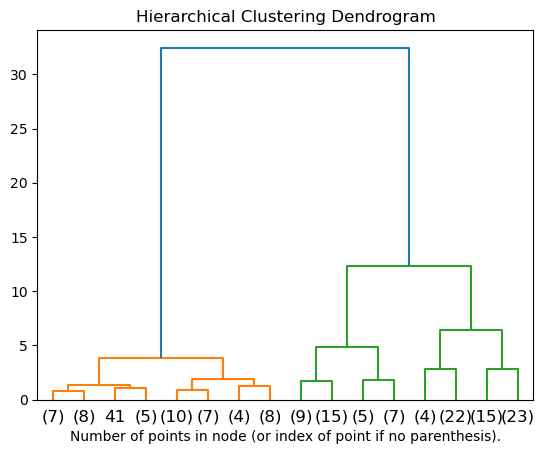

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    

iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [36]:

iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [38]:
model

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [39]:
model = model.fit(X)

In [42]:
model.children_.shape

(149, 2)

In [44]:
X.shape[0]

150

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

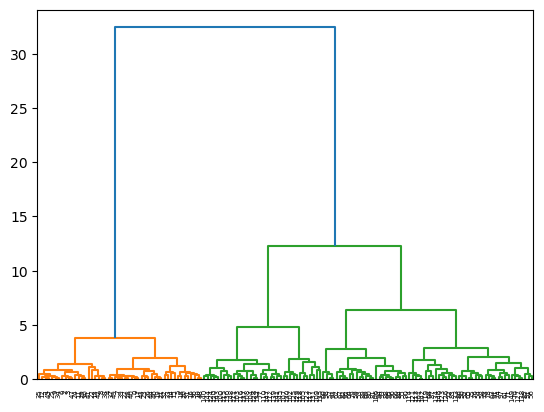

In [76]:
dendrogram(linkage_matrix)

In [46]:
counts = np.zeros(len(all_clusters))

In [49]:
n_samples = len(all_clusters.keys())

In [73]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    print(merge)

[101 142]
[ 7 39]
[ 0 17]
[ 9 34]
[128 132]
[10 48]
[ 4 37]
[19 21]
[29 30]
[57 93]
[80 81]
[116 137]
[ 8 38]
[ 3 47]
[27 28]
[82 92]
[95 96]
[127 138]
[ 1 45]
[63 91]
[65 75]
[ 40 152]
[123 126]
[ 49 151]
[112 139]
[94 99]
[ 12 168]
[ 88 166]
[66 84]
[23 26]
[53 89]
[74 97]
[ 25 153]
[ 46 157]
[  2 163]
[110 147]
[120 143]
[136 148]
[ 78 169]
[ 69 160]
[54 58]
[140 144]
[141 145]
[ 43 179]
[68 87]
[50 52]
[51 56]
[107 130]
[105 122]
[103 161]
[164 171]
[20 31]
[ 11 158]
[ 67 165]
[ 70 167]
[ 42 162]
[113 150]
[  6 184]
[173 200]
[55 90]
[176 182]
[ 86 195]
[124 186]
[ 83 133]
[ 5 18]
[ 13 205]
[175 177]
[32 33]
[125 129]
[104 154]
[ 73 188]
[149 204]
[146 172]
[121 206]
[ 36 155]
[ 76 190]
[115 187]
[61 71]
[156 208]
[ 72 213]
[117 131]
[191 212]
[ 24 202]
[ 98 159]
[ 16 224]
[ 35 210]
[64 79]
[ 85 196]
[ 77 185]
[ 44 183]
[111 199]
[180 189]
[102 218]
[174 192]
[181 227]
[170 225]
[118 198]
[14 15]
[178 209]
[222 229]
[201 234]
[114 223]
[ 60 233]
[217 247]
[ 59 241]
[207 232]
[197 2

In [72]:
merge

array([294, 297], dtype=int64)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [79]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [80]:
# Example data
data = np.array([
    [2, 3],
    [5, 6],
    [8, 7],
    [2, 8],
    [4, 2]
])

### Question 3.2: analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

- Kruskal's algorithm, it is often used when finding a minimum spanning tree.
- bigger k, less number of clusters

In [ ]:
yearly_return = yearly_return.reset_index()

In [66]:
yearly_return.columns= ['stock_name','return']

In [67]:
plot_data = pd.merge(yearly_return, melt_data_std)

In [78]:
all_clusters

{'SRCL': {'SRCL'},
 'COG': {'COG'},
 'PBI': {'PBI'},
 'AMZN': {'AMZN'},
 'WAT': {'WAT'},
 'DGX': {'DGX', 'LH'},
 'WU': {'WU'},
 'SYK': {'ABT',
  'ADP',
  'AFL',
  'AIG',
  'AJG',
  'AME',
  'AMG',
  'AMP',
  'AON',
  'BAC',
  'BBT',
  'BCR',
  'BEN',
  'BK',
  'BLK',
  'BRK-B',
  'C',
  'CB',
  'CFG',
  'CHD',
  'CINF',
  'CL',
  'CLX',
  'CMA',
  'COL',
  'DHR',
  'DPS',
  'EMR',
  'ETFC',
  'ETN',
  'FISV',
  'FITB',
  'GD',
  'GS',
  'HBAN',
  'HIG',
  'HON',
  'ITW',
  'IVZ',
  'JNJ',
  'JPM',
  'KEY',
  'KMB',
  'KO',
  'L',
  'LM',
  'LMT',
  'LNC',
  'MA',
  'MET',
  'MKC',
  'MMC',
  'MMM',
  'MS',
  'MTB',
  'NOC',
  'NTRS',
  'PAYX',
  'PBCT',
  'PCAR',
  'PEP',
  'PFG',
  'PG',
  'PGR',
  'PH',
  'PNC',
  'PRU',
  'RF',
  'ROP',
  'SCHW',
  'SNA',
  'STI',
  'STT',
  'SWK',
  'SYK',
  'TMK',
  'TROW',
  'TRV',
  'TXT',
  'UNM',
  'USB',
  'V',
  'WFC',
  'XL',
  'ZION'},
 'AN': {'AN'},
 'TAP': {'TAP'},
 'ABBV': {'ABBV'},
 'AZO': {'AZO'},
 'CSCO': {'CSCO'},
 'GPS': {'GPS'},
 

In [68]:
plot_data

,stock_name,return,std
0,MMM,-0.057624,0.011659
1,ABT,0.021440,0.013748
2,ABBV,-0.071393,0.020054
3,ACN,0.201626,0.012896
4,ATVI,0.942684,0.017541
...,...,...,...
491,YHOO,-0.337054,0.019475
492,YUM,0.032109,0.020421
493,ZBH,-0.081229,0.012888
494,ZION,-0.027638,0.017499


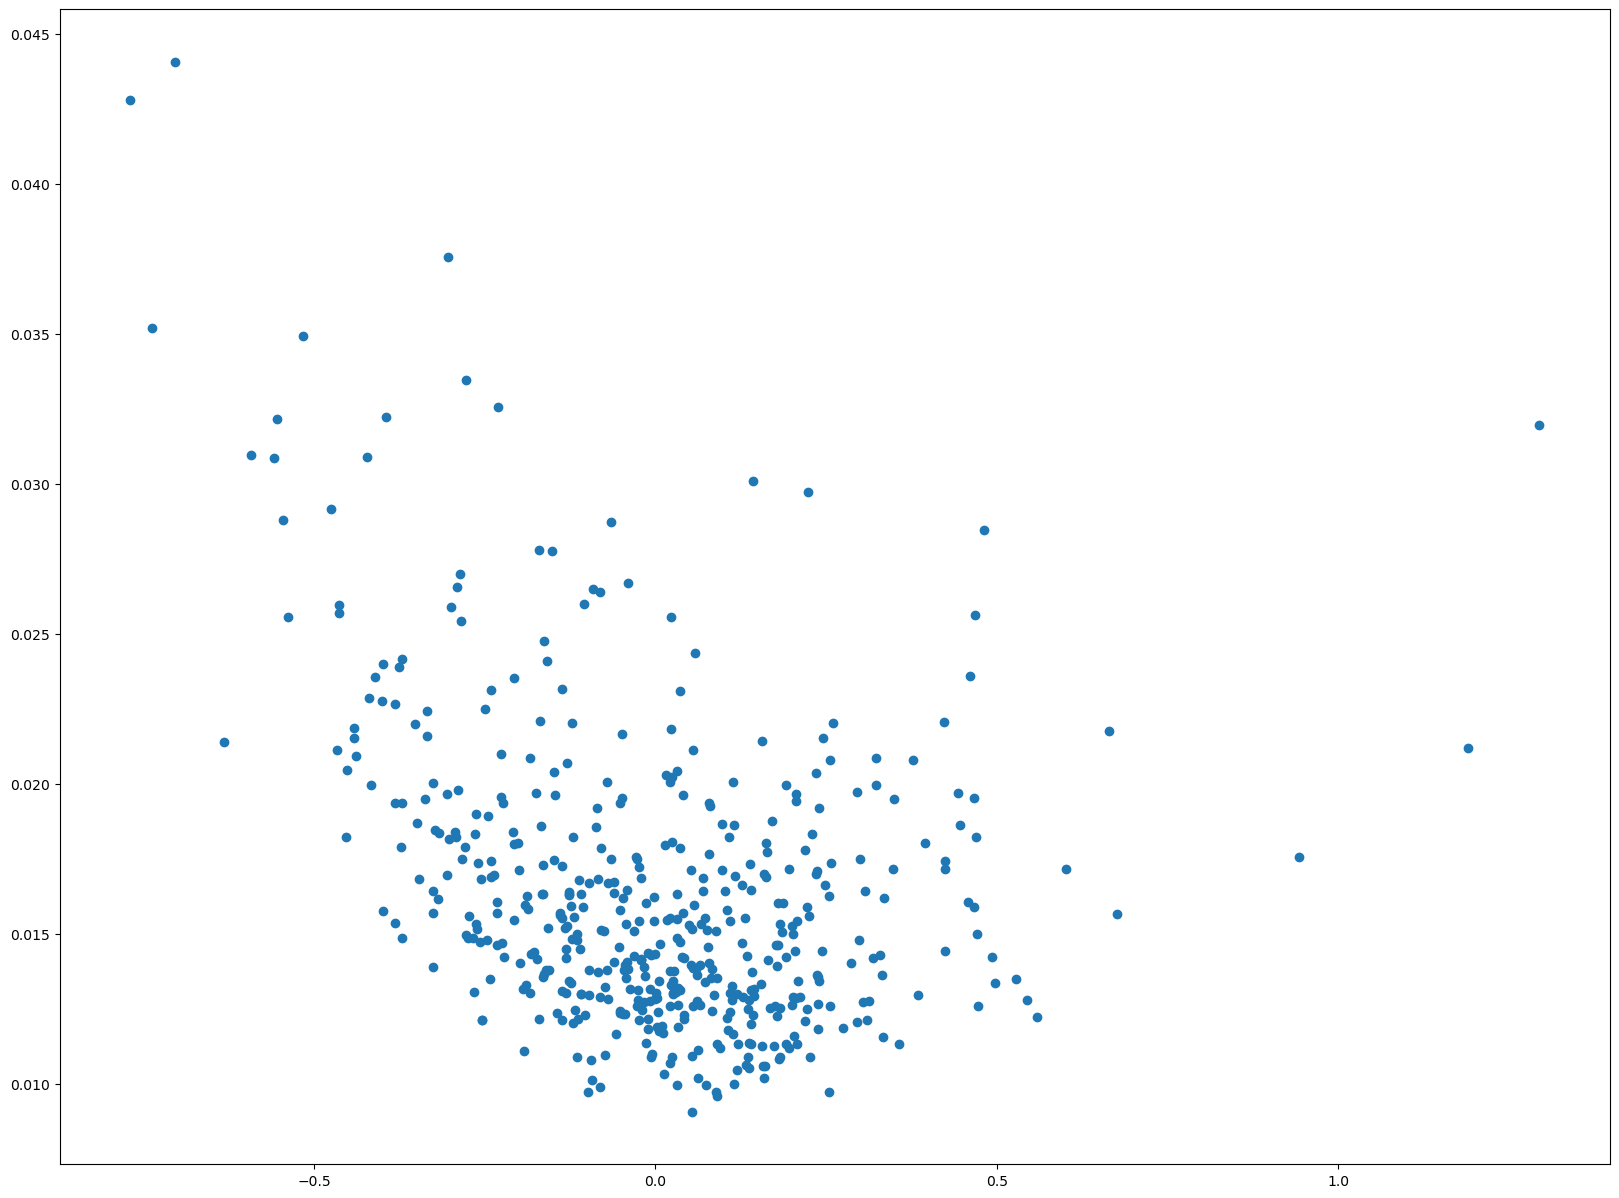

In [74]:
fig = plt.figure(figsize=(20,15))
plt.scatter(plot_data['return'],
        plot_data['std'],
           )

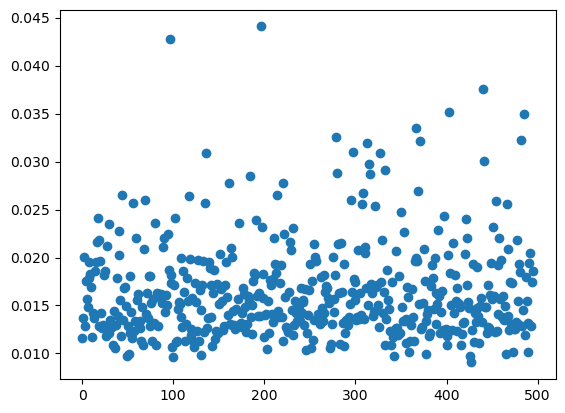

In [71]:
plt.scatter(plot_data.index,
        plot_data['std'],)

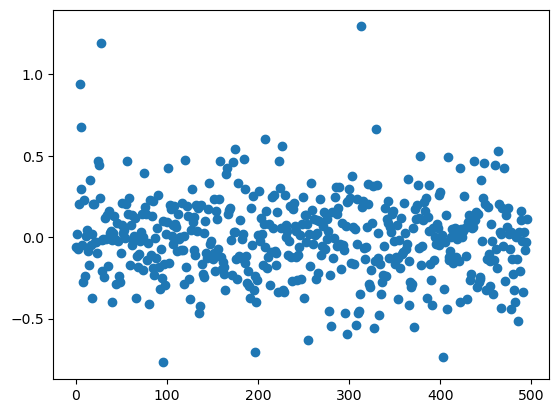

In [72]:
plt.scatter(plot_data.index,
        plot_data['return'],)

In [65]:
yearly_return

,stock_name,std
0,MMM,-0.057624
1,ABT,0.021440
2,ABBV,-0.071393
3,ACN,0.201626
4,ATVI,0.942684
...,...,...
491,YHOO,-0.337054
492,YUM,0.032109
493,ZBH,-0.081229
494,ZION,-0.027638


## Part 3: 

**40% of grade**

Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

You may use generative AI such as chatGPT to help with this part of the assignment (but not the other parts).

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.

### Question 4

Create cells below to add your extra part as code and narrative text explaining your idea and results.

## All done!

Create a zip file containing your submission and upload it on the Hub.